<a href="https://colab.research.google.com/github/coder-jkb/ML-projects/blob/main/ML_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING - MINI PROJECT**

## **TOPIC: CUSTOMER BUYING HABITS IN BANKING DOMAIN**

### *MEMBERS:*
### *> UMANG KIRIT LODAYA 60009200032*
### *> JAY BHANUSHALI 60009200047*

### *BATCH/DIV: K - K2 BATCH*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **LOADING THE DATASETS**

**TRAINING DATASET**

In [ ]:
path1 = '/content/drive/MyDrive/ML MINI PROJECT/Train.xlsx'
train_data = pd.read_excel(path1)
train_data

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

**TESTING DATASET**

In [ ]:
path2 = '/content/drive/MyDrive/ML MINI PROJECT/Test.xlsx'
test_data = pd.read_excel(path2)
test_data

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

## **PREPROCESSING**

### **HANDLING DUPLICATE VALUES**

In [ ]:
duplicate = train_data[train_data.duplicated(keep='first')]
print("DUPLICATE ROWS IN TRAINING DATASET:",duplicate.shape)

DUPLICATE ROWS IN TRAINING DATASET: (0, 18)


In [ ]:
duplicate = test_data[test_data.duplicated(keep='first')]
print("DUPLICATE ROWS IN TESTING DATASET:",duplicate.shape)

DUPLICATE ROWS IN TESTING DATASET: (0, 17)


THUS, THERE ARE NO DUPLICATE VALUES IN BOTH DATASETS

### **HANDLING NULL VALUES IN TRAINING DATA**

In [ ]:
# GETTING THE NULL VALUES
train_data.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

AS WE CAN SEE, **days_since_prev_campaign_contact** COLUMN HAS 80% NULL VALUE. 

THUS, WE ARE DROPPING THIS COLUMN

SINCE OUR DATA SAMPLE ARE INDEPENDENT AND IDENTICALLY DISTRIBUTED (IID), THUS WE REMOVE THE **id** COLUMN, GIVEN THAT ALL SAMPLES COME FROM OR REFER TO THE SAME SOURCE/OBJECT AND THEY DON'T SOMEHOW IDENTIFY THE SAMPLE CLASS.

In [ ]:
# DROPPING COLUMN
train_data.drop(['days_since_prev_campaign_contact'], axis=1, inplace=True)

# DROPPING THE id COLUMN
train_data.drop(['id'], axis=1, inplace=True)
train_data

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,3,other,0
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,0,unknown,0
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,0,unknown,0
31645,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,0,unknown,0


In [ ]:
# GETTING NULL VALUES
train_data.isnull().sum()

customer_age                  619
job_type                        0
marital                       150
education                       0
default                         0
balance                       399
housing_loan                    0
personal_loan                 149
communication_type              0
day_of_month                    0
month                           0
last_contact_duration         311
num_contacts_in_campaign      112
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

#### **FILLING NULL VALUES WITH MODE IN COLUMNS WITH TYPE OBJECT**

In [ ]:
obj = train_data.select_dtypes(include='object')
obj.isna().sum()

job_type                   0
marital                  150
education                  0
default                    0
housing_loan               0
personal_loan            149
communication_type         0
month                      0
prev_campaign_outcome      0
dtype: int64

**marital AND personal_loan ARE dtype: object COLUMNS WITH NULL VALUES WHICH WILL BE FILLED BY MODE VALUE**

In [ ]:
# GETTING MODE VALUE OF MARITAL STATUS
x = train_data['marital'].mode()
x

0    married
dtype: object

In [ ]:
# FILLING NULL VALUES WITH MODE IN marital
train_data['marital'].fillna(x[0], inplace=True)

In [ ]:
# GETTING MODE VALUE OF personal_loan
x = train_data['personal_loan'].mode()
x

0    no
dtype: object

In [ ]:
# FILLING NULL VALUES WITH MODE IN personal_loan
train_data['personal_loan'].fillna(x[0], inplace=True)

#### **FILLING NULL VALUES IN NUMERICAL COLUMNS**

In [ ]:
float_cols = train_data.select_dtypes(include='float64')
float_cols.isna().sum()

customer_age                619
balance                     399
last_contact_duration       311
num_contacts_in_campaign    112
dtype: int64

**CHECKING FOR OUTLIERS IN NUMERICAL COLUMNS USING BOXPLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

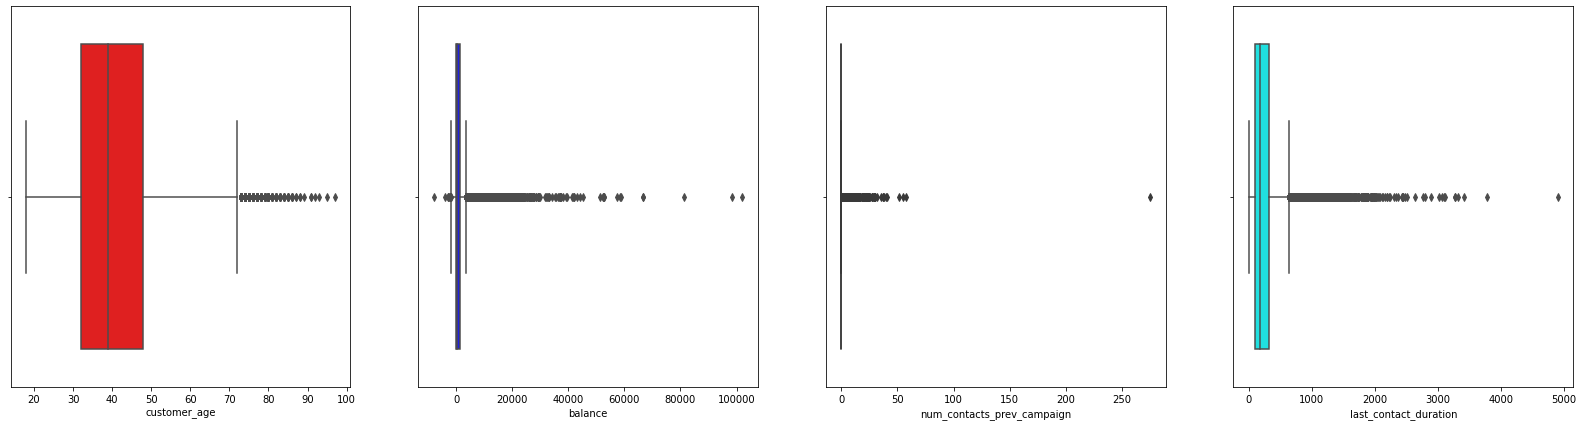

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)
sns.boxplot(train_data['customer_age'], ax=axes[0], color='r')
sns.boxplot(train_data['balance'], ax=axes[1], color='b')
sns.boxplot(train_data['num_contacts_prev_campaign'], ax=axes[2], color='y')
sns.boxplot(train_data['last_contact_duration'], ax=axes[3], color='cyan')

In [ ]:
Q1 = train_data.quantile(0.10)
Q3 = train_data.quantile(0.90)
IQR = Q3 - Q1

train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

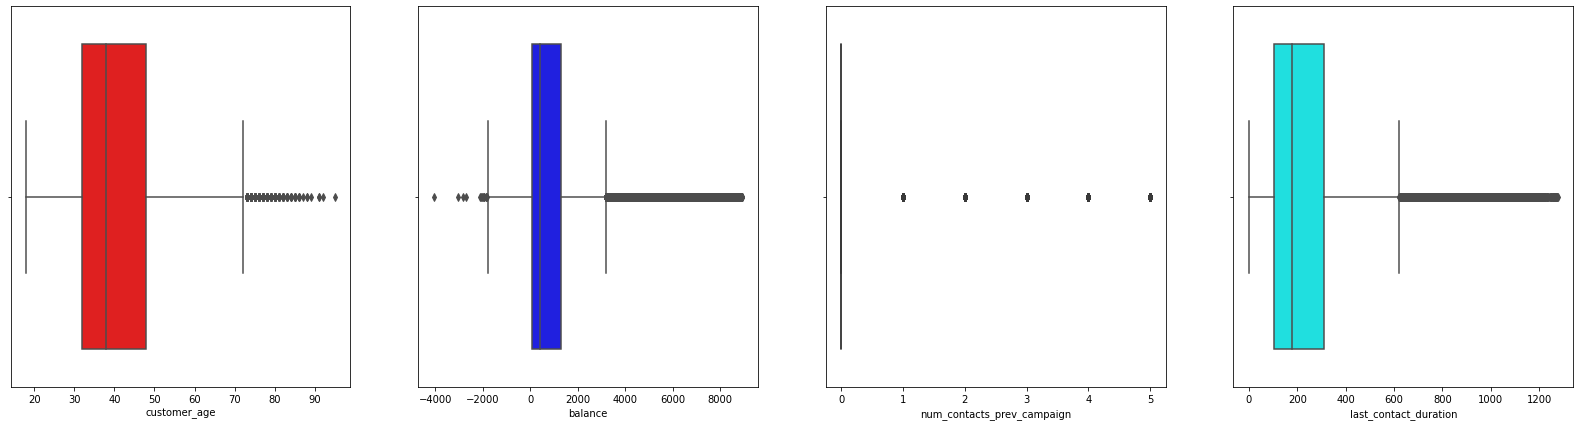

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)
sns.boxplot(train_data['customer_age'], ax=axes[0], color='r')
sns.boxplot(train_data['balance'], ax=axes[1], color='b')
sns.boxplot(train_data['num_contacts_prev_campaign'], ax=axes[2], color='y')
sns.boxplot(train_data['last_contact_duration'], ax=axes[3], color='cyan')

**THE OUTLIERS CAN HIGHLY DEVIATE THE MEAN OF THE COLUMNS HENCE IT IS MORE APPROPRIATE TO REPLACE THE NULL VALUES WITH MEDIAN**

In [ ]:
# GETTING MEDIAN AGE AS AGE IS FLOATING VALUE
x = train_data['customer_age'].median()
x

38.0

In [ ]:
# FILLING NULL VALUES IN customer_age COLUMN WITH MEDIAN
train_data['customer_age'].fillna(x, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# GETTING MEDIAN BALANCE VALUE
x = train_data['balance'].median()
x

425.0

In [ ]:
# FILLING NULL VALUES IN balance COLUMN WITH MEDIAN
train_data['balance'].fillna(x, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# GETTING MEDIAN VALUE OF last_call_duration COLUMN
x = train_data['last_contact_duration'].median()
x

180.0

In [ ]:
# FILLING NULL VALUES IN last_contact_duration COLUMN WITH MEDIAN
train_data['last_contact_duration'].fillna(x, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# GETTING MEDIAN VALUE OF num_contact_in_campaign COLUMN
x = train_data['num_contacts_in_campaign'].median()
x

2.0

In [ ]:
# FILLING NULL VALUES IN num_contacts_in_campaign COLUMN WITH MEDIAN AS MEAN VALUE CAN BE INFLUENCED BY OUTLIER, BUT MEDIAN WILL NOT
train_data['num_contacts_in_campaign'].fillna(x, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
train_data.isnull().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

**THUS, WE HAVE HANDLED ALL NULL VALUES IN TRAINING DATA SET**

### **HANDLING NULL VALUES IN TESTING DATA**

In [ ]:
# DROPPING COLUMN
test_data.drop(['days_since_prev_campaign_contact'], axis=1, inplace=True)

# DROPPING THE id COLUMN
test_data.drop(['id'], axis=1, inplace=True)
test_data

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,0,unknown
1,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,0,unknown
2,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,0,unknown
3,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,0,unknown
4,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,0,unknown
13560,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,0,unknown
13561,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,0,unknown
13562,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,5,failure


**AS WE HAVE DROPPED THE FOLLOWING COLUMNS FROM TRAIN DATA WE HAVE TO DROP THEM FROM TEST DATA AS WELL:**
- id
- days_since_prev_campaign_contact

In [ ]:
# GETTING COUNT OF ALL NULL VALUES
test_data.isnull().sum()

customer_age                  270
job_type                        0
marital                        81
education                       0
default                         0
balance                       181
housing_loan                    0
personal_loan                  74
communication_type              0
day_of_month                    0
month                           0
last_contact_duration         122
num_contacts_in_campaign       45
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                13294 non-null  float64
 1   job_type                    13564 non-null  object 
 2   marital                     13483 non-null  object 
 3   education                   13564 non-null  object 
 4   default                     13564 non-null  object 
 5   balance                     13383 non-null  float64
 6   housing_loan                13564 non-null  object 
 7   personal_loan               13490 non-null  object 
 8   communication_type          13564 non-null  object 
 9   day_of_month                13564 non-null  int64  
 10  month                       13564 non-null  object 
 11  last_contact_duration       13442 non-null  float64
 12  num_contacts_in_campaign    13519 non-null  float64
 13  num_contacts_prev_campaign  135

In [ ]:
test_data.select_dtypes(include="int64").isnull().sum()

day_of_month                  0
num_contacts_prev_campaign    0
dtype: int64

**WE DO NOT HAVE ANY NULL VALUES IN INT64 TYPE COLUMNS**

#### **FILLING NULL VALUE WITH MODE IN COLUMNS WITH DTYPE OBJECT**

In [ ]:
# displaying object columns with null values
test_data.select_dtypes(include="object").isnull().sum()

job_type                  0
marital                  81
education                 0
default                   0
housing_loan              0
personal_loan            74
communication_type        0
month                     0
prev_campaign_outcome     0
dtype: int64

**WE HAVE TO REPLACE MARITAL AND PERSONAL_LOAN WITH THE MODE OF RESPECTIVE COLUMNS**

In [ ]:
for col in ['marital', 'personal_loan']:
  col_mode = test_data[col].mode()[0]
  test_data[col].fillna(col_mode, inplace=True)

test_data.select_dtypes(include="object").isnull().sum()

job_type                 0
marital                  0
education                0
default                  0
housing_loan             0
personal_loan            0
communication_type       0
month                    0
prev_campaign_outcome    0
dtype: int64

#### **HANDLING OUTLIER**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

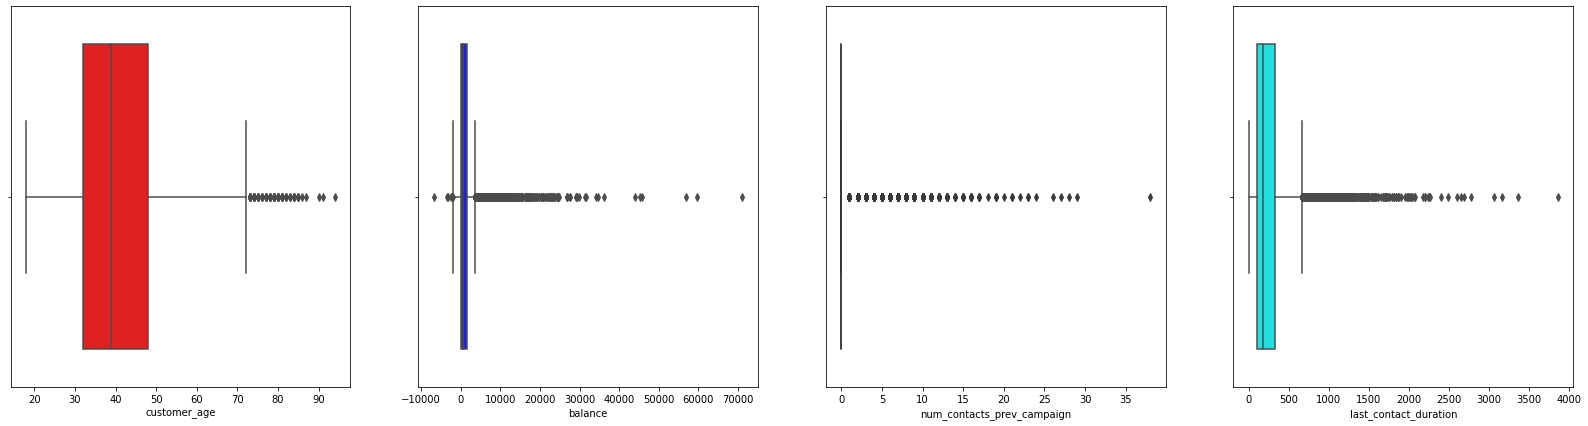

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)
sns.boxplot(test_data['customer_age'], ax=axes[0], color='r')
sns.boxplot(test_data['balance'], ax=axes[1], color='b')
sns.boxplot(test_data['num_contacts_prev_campaign'], ax=axes[2], color='y')
sns.boxplot(test_data['last_contact_duration'], ax=axes[3], color='cyan')

In [ ]:
Q1 = test_data.quantile(0.10)
Q3 = test_data.quantile(0.90)
IQR = Q3 - Q1

test_data = test_data[~((test_data < (Q1 - 1.5 * IQR)) |(test_data > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

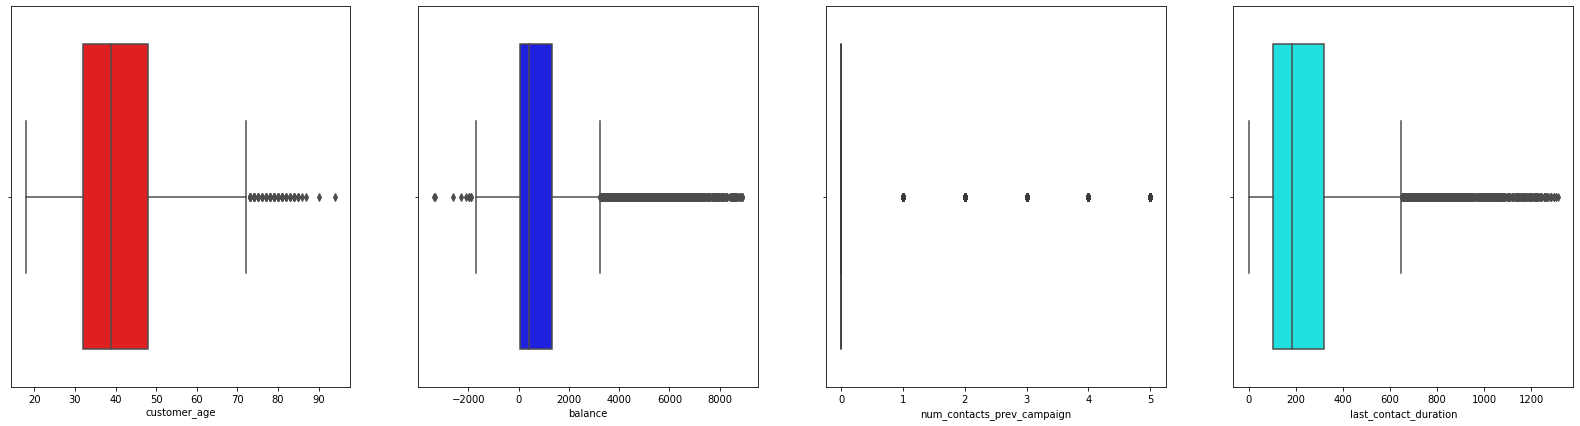

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)
sns.boxplot(test_data['customer_age'], ax=axes[0], color='r')
sns.boxplot(test_data['balance'], ax=axes[1], color='b')
sns.boxplot(test_data['num_contacts_prev_campaign'], ax=axes[2], color='y')
sns.boxplot(test_data['last_contact_duration'], ax=axes[3], color='cyan')

#### **FILLING NULL VALUE WITH MEDIAN IN COLUMNS DTYPE FLOAT64**

In [ ]:
# displaying columns with type float64 having null values
test_data.select_dtypes(include="float64").isnull().sum()

customer_age                247
balance                     168
last_contact_duration       113
num_contacts_in_campaign     42
dtype: int64

In [ ]:
for col in ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']:
  col_median = test_data[col].median()
  test_data[col].fillna(col_median, inplace=True)

test_data.select_dtypes(include="float64").isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


customer_age                0
balance                     0
last_contact_duration       0
num_contacts_in_campaign    0
dtype: int64

#### **NOW WE ARE RID OF ALL NULL VALUES FROM TRAINING AS WELL AS TESTING DATASET**

In [ ]:
train_data.isnull().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

In [ ]:
test_data.isnull().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

### **GETTING INFORMATION ON TRAINING DATA**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29210 entries, 0 to 31646
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                29210 non-null  float64
 1   job_type                    29210 non-null  object 
 2   marital                     29210 non-null  object 
 3   education                   29210 non-null  object 
 4   default                     29210 non-null  object 
 5   balance                     29210 non-null  float64
 6   housing_loan                29210 non-null  object 
 7   personal_loan               29210 non-null  object 
 8   communication_type          29210 non-null  object 
 9   day_of_month                29210 non-null  int64  
 10  month                       29210 non-null  object 
 11  last_contact_duration       29210 non-null  float64
 12  num_contacts_in_campaign    29210 non-null  float64
 13  num_contacts_prev_campaign  292

COLUMNS WITH object AS Dtype (CATEGORICAL COLUMNS) ARE: 

1. job_type
2. marital
3. education
4. default
5. housing_loan
6. personal_loan
7. communication_type
8. month
9. prev_campaign_outcome

**PRINTING NUMBER OF UNIQUE VALUES OF THE CATEGORICAL COLUMNS**

In [ ]:
# GETTING UNIQUE VALUES OF 'marital' COLUMN
train_data['marital'].value_counts()

married     17593
single       8160
divorced     3457
Name: marital, dtype: int64

In [ ]:
# GETTING UNIQUE VALUES OF 'job_type' COLUMN
train_data['job_type'].value_counts()

blue-collar      6385
management       6045
technician       4790
admin.           3359
services         2735
retired          1466
self-employed    1007
entrepreneur      954
unemployed        845
housemaid         832
student           608
unknown           184
Name: job_type, dtype: int64

In [ ]:
# GETTING UNIQUE VALUES OF 'education' COLUMN
train_data['education'].value_counts()

secondary    15105
tertiary      8437
primary       4478
unknown       1190
Name: education, dtype: int64

In [ ]:
# GETTING UNIQUE VALUES OF 'default' COLUMN
train_data['default'].value_counts()

no     28684
yes      526
Name: default, dtype: int64

In [ ]:
# GETTING UNIQUE VALUES OF 'housing_loan' COLUMN
train_data['housing_loan'].value_counts()

yes    16396
no     12814
Name: housing_loan, dtype: int64

In [ ]:
# GETTING UNIQUE VALUES OF 'personal_loan' COLUMN
train_data['personal_loan'].value_counts()

no     24494
yes     4716
Name: personal_loan, dtype: int64

In [ ]:
# GETTING UNIQUE VALUES OF 'communication_type' COLUMN
train_data['communication_type'].value_counts()

cellular     18776
unknown       8656
telephone     1778
Name: communication_type, dtype: int64

In [ ]:
# GETTING UNIQUE VALUES OF 'month' COLUMN
train_data['month'].value_counts()

may    9151
jul    4440
aug    3886
jun    3418
nov    2525
apr    1956
feb    1695
jan     896
oct     444
sep     363
mar     300
dec     136
Name: month, dtype: int64

In [ ]:
# GETTING UNIQUE VALUES OF 'prev_campaign_outcome' COLUMN
train_data['prev_campaign_outcome'].value_counts()

unknown    24317
failure     3019
other        996
success      878
Name: prev_campaign_outcome, dtype: int64

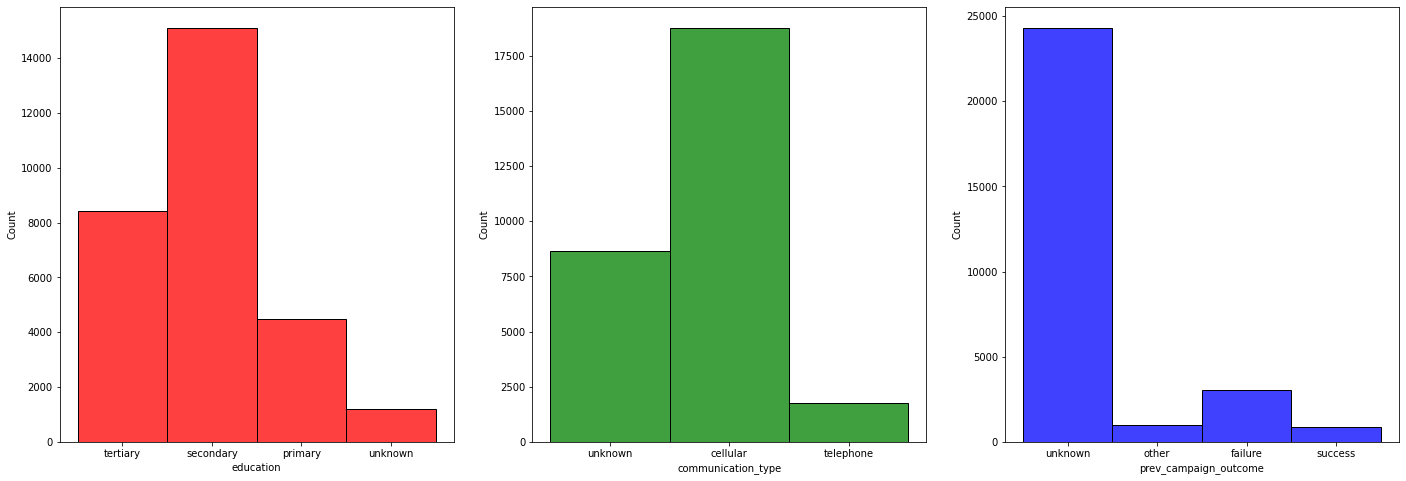

In [ ]:
# PLOT HISTOGRAM OF FEATURES
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=False)
sns.histplot(train_data, ax=axes[0], x="education", color='r')
sns.histplot(train_data, ax=axes[1], x="communication_type", color='g')
sns.histplot(train_data, ax=axes[2], x="prev_campaign_outcome", color='b')

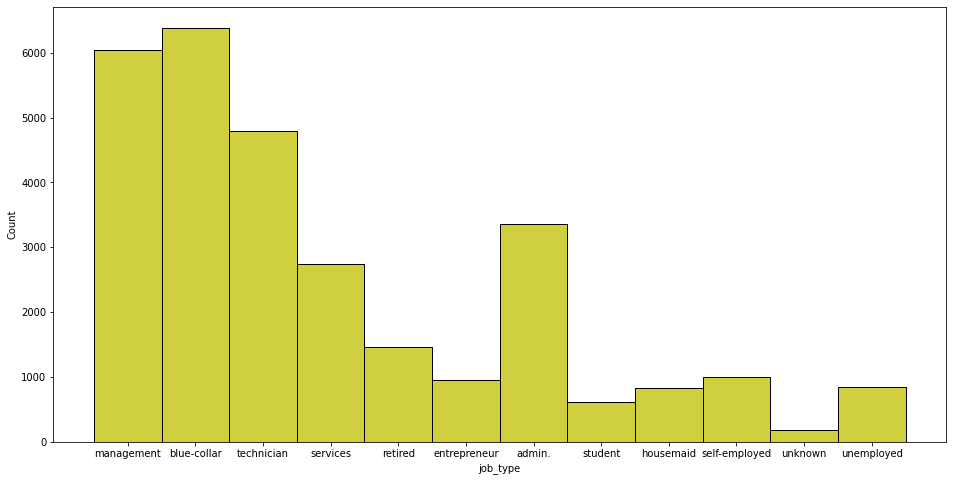

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
sns.histplot(train_data, x="job_type", color='y')

### **CORRELATION HEATMAP**



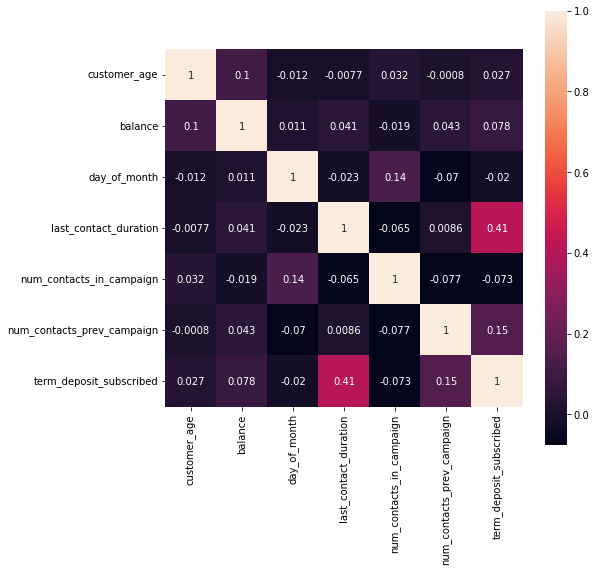

In [ ]:
corr = train_data.corr()
fig = plt.figure(figsize = (8, 8))
sns.heatmap(corr, annot=True, square=True)
plt.show()

- **WE CAN SEE A SLIGHT CORRELATION BETWEEN ```LAST_CONTACT_DURATION``` AND ```TERM_DEPOSIT_SCBSCRIBED``` (LABEL)**

- **APART FROM THIS THERE IS NO SIGNIFICANT CORRELATION AMONG THE FEATURES**

### **LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

 #### **ENCODING IN TRAINING DATASET**

In [ ]:
# LABEL ENCODING THE CATEGORICAL FEATURES AND LABEL
obj_cols = train_data.select_dtypes(include='object').columns
print("OBJECT COLUMNS TO BE ENCODED ARE:\n", list(obj_cols))

OBJECT COLUMNS TO BE ENCODED ARE:
 ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']


In [ ]:
for col in obj_cols:
    train_data[col] = le.fit_transform(train_data[col])

train_data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4,2,2,0,285.0,1,0,2,26,6,303.0,4.0,0,3,0
1,34.0,1,1,1,0,934.0,0,1,0,18,9,143.0,2.0,1,1,0
2,46.0,9,1,1,0,656.0,0,0,0,5,3,101.0,4.0,0,3,0
3,34.0,7,2,1,0,2.0,1,0,2,20,8,127.0,3.0,0,3,0
4,41.0,1,1,0,0,1352.0,1,0,0,13,8,49.0,2.0,0,3,0
5,65.0,5,1,0,0,2880.0,0,0,0,23,0,163.0,1.0,0,3,1
6,57.0,1,1,0,0,495.0,0,0,0,18,1,687.0,4.0,0,3,1
7,37.0,4,1,2,0,650.0,1,0,2,26,8,210.0,1.0,0,3,0
8,29.0,9,1,1,0,265.0,1,0,0,19,1,160.0,2.0,0,3,0
9,50.0,1,1,1,0,407.0,1,1,0,7,1,233.0,2.0,0,3,0


#### **ENCODING IN TESTING DATASET**

In [ ]:
# LABEL ENCODING THE CATEGORICAL FEATURES AND LABEL
obj_cols = test_data.select_dtypes(include='object').columns
print("OBJECT COLUMNS TO BE ENCODED ARE:\n", list(obj_cols))

OBJECT COLUMNS TO BE ENCODED ARE:
 ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']


In [ ]:
for col in obj_cols:
    test_data[col] = le.fit_transform(test_data[col])

test_data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,55.0,5,1,2,0,7136.0,0,0,0,13,1,90.0,2.0,0,3
1,24.0,1,2,1,0,179.0,1,0,0,18,8,63.0,2.0,0,3
2,46.0,9,0,1,0,143.0,0,0,0,8,5,208.0,1.0,0,3
3,56.0,3,2,3,0,6023.0,0,0,2,6,6,34.0,1.0,0,3
4,62.0,5,1,1,0,2913.0,0,0,0,12,0,127.0,1.0,1,2
5,35.0,6,2,2,0,355.0,0,0,0,12,1,599.0,1.0,0,3
6,27.0,3,2,1,0,718.0,1,0,2,8,8,94.0,3.0,0,3
7,29.0,4,2,2,0,54.0,1,1,2,26,8,253.0,3.0,0,3
8,50.0,3,1,1,0,3815.0,0,0,2,9,6,136.0,2.0,0,3
9,37.0,4,2,2,0,52.0,1,1,0,25,5,211.0,1.0,0,3


**LABEL ENCODED FOR BOTH THE DATASETS**

*PREPROCESSING FOR BOTH TRAINING & TESTING DATASETS IS COMPLETED*

## **PERFORMING CLUSTERING ON TRAINING DATASET**

WE HAVE GOT OUR DATASET IN NUMERIC BUT STILL WE CANT APPLY ALGORITHM BECAUSE CHANGING TO LABEL ENCODING DATA AND APPLYING K-MEANS MAY NOT GIVE GOOD RESULT SO WE ARE AGAIN CHANGING THEM TO ONE-HOT ENCODED DATA WITH ONE-HOT ENCODING METHOD.

In [ ]:
print(obj_cols)

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')


In [ ]:
train_onehot = train_data.copy()
train_onehot = pd.get_dummies(train_onehot, columns = obj_cols, prefix = obj_cols )

In [ ]:
train_onehot

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,job_type_0,job_type_1,job_type_2,...,month_6,month_7,month_8,month_9,month_10,month_11,prev_campaign_outcome_0,prev_campaign_outcome_1,prev_campaign_outcome_2,prev_campaign_outcome_3
0,28.0,285.0,26,303.0,4.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,34.0,934.0,18,143.0,2.0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,46.0,656.0,5,101.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34.0,2.0,20,127.0,3.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,41.0,1352.0,13,49.0,2.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,567.0,2,99.0,2.0,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
31643,51.0,1072.0,20,31.0,7.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31644,41.0,242.0,23,89.0,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31645,48.0,2699.0,11,216.0,6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


WHEN WE APPLY ONE-HOT ENCODING, OUR DATASET ATTRIBUTES INCREASED UPTO 51.BUT BEFORE MOVING TO THINK ABOUT IT, LET US USE SCALING METHOD(STANDARD SCALING) TO SCALE OUR DATA.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS = StandardScaler()
train_onehot = SS.fit_transform(train_onehot)

NOW WE NEED TO REDUCE THE DIMENSION OF OUR DATA, SO WE ARE APPLYING PCA TECHNIQUE.

In [ ]:
from sklearn.decomposition import PCA

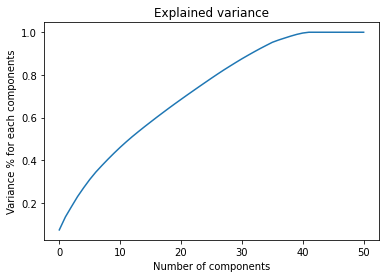

In [ ]:
# FITTING PCA
pca = PCA().fit(train_onehot)

#PLOT
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance % for each components')
plt.title('Explained variance')
plt.show()

FROM ABOVE FIGURE IT SEEMS THAT OUR COMPONENTS BENDS AFTER APPROX. 40, SO WE SELECT NEARLY 40 FOR 100% VARIANCE DATA.

In [ ]:
pca=PCA(n_components=40)

pca.fit(train_onehot)
train = pca.transform(train_onehot)

In [ ]:
train

array([[-1.28988065, -0.5182775 , -2.78786597, ...,  0.39874246,
        -0.01768823, -0.33025263],
       [ 1.725206  ,  1.65747156,  1.59751002, ..., -0.2549129 ,
         0.7552002 ,  0.0140715 ],
       [ 0.89510858, -1.12609457,  0.48130568, ...,  0.06736933,
        -0.55916367,  0.01951675],
       ...,
       [-2.62981489,  0.21145962,  1.11137689, ..., -0.24438223,
        -0.41983649, -0.45410757],
       [ 0.71057701, -1.89587521,  0.66060798, ...,  0.19416278,
        -0.06036407,  0.51092024],
       [ 1.753476  , -2.48077745, -2.44737839, ...,  0.0968703 ,
         0.62416545,  0.98636592]])

WE ARE APPLYING K-MEANS ALGORITHM TO OUR DATA. BUT HOW TO DETERMINE K VALUE!! IT IS EASY. WE WILL USE ELBOW METHOD TO DETERMINE THE VALUE OF K. WE WILL VISUALIZE IT AND SEE FROM WHERE IT FORMS AN ELBOW.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

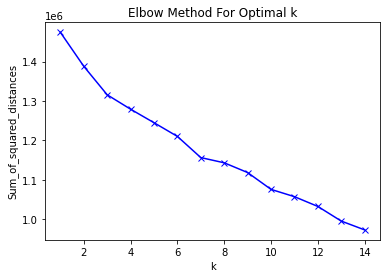

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train)
    Sum_of_squared_distances.append(km.inertia_)

#VISUALIZING PLOT
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=50, max_iter=1000, verbose=0, random_state=50, copy_x=False, algorithm='auto')
y_kmeans=kmeans.fit_predict(train)

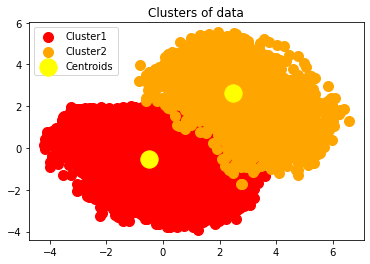

In [ ]:
#PLOTTING THROUGH K-MEANS
plt.scatter(train[y_kmeans==0,0],train[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(train[y_kmeans==1,0],train[y_kmeans==1,1],s=100,c='orange',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of data')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_train = train_data['term_deposit_subscribed'].values

In [ ]:
score = accuracy_score(y_train, kmeans.predict(train))

In [ ]:
print("ACCURACY ON CLUSTER:",score)

ACCURACY ON CLUSTER: 0.8046217048955837


## **PERFORMING CLUSTERING ON TESTING DATASET**

WE HAVE GOT OUR DATASET IN NUMERIC BUT STILL WE CANT APPLY ALGORITHM BECAUSE CHANGING TO LABEL ENCODING DATA AND APPLYING K-MEANS MAY NOT GIVE GOOD RESULT SO WE ARE AGAIN CHANGING THEM TO ONE-HOT ENCODED DATA WITH ONE-HOT ENCODING METHOD.

In [ ]:
print(obj_cols)

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')


In [ ]:
test_onehot = test_data.copy()
test_onehot = pd.get_dummies(test_onehot, columns = obj_cols, prefix = obj_cols )

In [ ]:
test_onehot

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_0,job_type_1,job_type_2,job_type_3,...,month_6,month_7,month_8,month_9,month_10,month_11,prev_campaign_outcome_0,prev_campaign_outcome_1,prev_campaign_outcome_2,prev_campaign_outcome_3
0,55.0,7136.0,13,90.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,24.0,179.0,18,63.0,2.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,46.0,143.0,8,208.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,56.0,6023.0,6,34.0,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,62.0,2913.0,12,127.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,29.0,717.0,15,94.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
13560,39.0,604.0,10,155.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13561,45.0,237.0,16,231.0,4.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
13562,52.0,241.0,13,243.0,2.0,5,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


WHEN WE APPLY ONE-HOT ENCODING, OUR DATASET ATTRIBUTES INCREASED UPTO 51.BUT BEFORE MOVING TO THINK ABOUT IT, LET US USE SCALING METHOD(STANDARD SCALING) TO SCALE OUR DATA.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS = StandardScaler()
test_onehot = SS.fit_transform(test_onehot)

NOW WE NEED TO REDUCE THE DIMENSION OF OUR DATA, SO WE ARE APPLYING PCA TECHNIQUE.

In [ ]:
from sklearn.decomposition import PCA

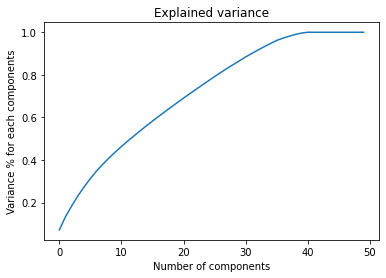

In [ ]:
# FITTING PCA
pca = PCA().fit(test_onehot)

# PLOT
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance % for each components')
plt.title('Explained variance')
plt.show()

FROM ABOVE FIGURE IT SEEMS THAT OUR COMPONENTS BENDS AFTER APPROX. 40 SO WE SELECT NEARLY 40 FOR 100% VARIANCE DATA.

In [ ]:
pca=PCA(n_components=40)

pca.fit(test_onehot)
test = pca.transform(test_onehot)

In [ ]:
test

array([[ 2.40278013, -3.07454633,  2.02979559, ..., -2.12615506,
        -0.65984045,  0.36847018],
       [-1.32350176,  1.68215631, -1.90798662, ..., -0.58245977,
        -0.11203644, -1.19145404],
       [ 0.82063264, -1.17269653, -0.86549389, ...,  0.27585672,
         0.14916542,  0.31839848],
       ...,
       [-3.20663767,  0.31168808,  1.95499103, ...,  0.35703556,
        -0.10101019,  0.50269394],
       [ 1.59016798,  4.58192774,  3.27147649, ...,  0.97143031,
         0.11716978, -0.40919955],
       [-0.01028788, -0.5696224 ,  0.36928894, ...,  0.60247256,
         0.01997879,  0.15706593]])

WE ARE APPLYING K-MEANS ALGORITHM TO OUR DATA. BUT HOW TO DETERMINE K VALUE!! IT IS EASY. WE WILL USE ELBOW METHOD TO DETERMINE THE VALUE OF K. WE WILL VISUALIZE IT AND SEE FROM WHERE IT FORMS AN ELBOW.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

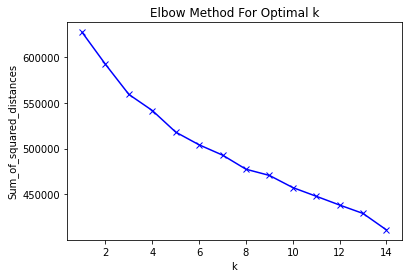

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(test)
    Sum_of_squared_distances.append(km.inertia_)

#VISUALIZING PLOT
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=50, max_iter=1000, verbose=0, random_state=50, copy_x=False, algorithm='auto')
y_kmeans=kmeans.fit_predict(test)

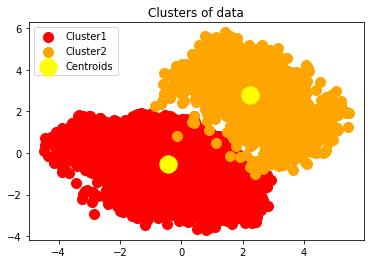

In [ ]:
#PLOTTING THROUGH K-MEANS
plt.scatter(test[y_kmeans==0,0],test[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(test[y_kmeans==1,0],test[y_kmeans==1,1],s=100,c='orange',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of data')
plt.legend()
plt.show()

In [ ]:
print("PREDICTED LABELS:\n",y_kmeans)

PREDICTED LABELS:
 [0 0 0 ... 0 1 0]


In [ ]:
# ADDING LABEL COLUMN TO TESTING DATA
test_data['term_deposit_subscribed'] = y_kmeans

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12589 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                12589 non-null  float64
 1   job_type                    12589 non-null  int64  
 2   marital                     12589 non-null  int64  
 3   education                   12589 non-null  int64  
 4   default                     12589 non-null  int64  
 5   balance                     12589 non-null  float64
 6   housing_loan                12589 non-null  int64  
 7   personal_loan               12589 non-null  int64  
 8   communication_type          12589 non-null  int64  
 9   day_of_month                12589 non-null  int64  
 10  month                       12589 non-null  int64  
 11  last_contact_duration       12589 non-null  float64
 12  num_contacts_in_campaign    12589 non-null  float64
 13  num_contacts_prev_campaign  125

THUS, WE HAVE PREDICTED THE Y VALUES, BASED ON CLUSTERING

### **MAKING THE MODEL**

#### **GETTING OUR DATASETS**



In [ ]:
data = train_data.copy()
data.append(test_data)

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4,2,2,0,285.0,1,0,2,26,6,303.0,4.0,0,3,0
1,34.0,1,1,1,0,934.0,0,1,0,18,9,143.0,2.0,1,1,0
2,46.0,9,1,1,0,656.0,0,0,0,5,3,101.0,4.0,0,3,0
3,34.0,7,2,1,0,2.0,1,0,2,20,8,127.0,3.0,0,3,0
4,41.0,1,1,0,0,1352.0,1,0,0,13,8,49.0,2.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,29.0,4,2,2,0,717.0,1,0,0,15,6,94.0,1.0,0,3,0
13560,39.0,1,1,1,0,604.0,1,0,1,10,5,155.0,1.0,0,3,0
13561,45.0,1,1,0,0,237.0,1,0,2,16,8,231.0,4.0,0,3,0
13562,52.0,0,1,0,0,241.0,1,0,0,13,8,243.0,2.0,5,0,1


#### **SPLITTING THE DATASET**

In [ ]:
# GETTING FEATURES AND LABEL
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)

In [ ]:
# GETTING TRAINING DATA
X_train = train_data.iloc[:, :-1].values
Y_train = train_data.iloc[:, -1].values.reshape(-1,1)

In [ ]:
# GETTING TESTING DATA
X_test = test_data.iloc[:, :-1].values
Y_test = test_data.iloc[:, -1].values.reshape(-1,1) 

#### **BUILDING THE MODEL**

**BUILDING RANDOM FOREST CLASSIFIER**

In [ ]:
# IMPORT RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=1000)
RF = RF.fit(X_train, Y_train)

# TRAINING 
Y_train_pred = RF.predict(X_train)

# TEST 
Y_test_pred = RF.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# CHECKING PERFORMANCE
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(Y_train,Y_train_pred)  #ACCURACY SCORE ON TRAINING DATA
print("ACCURACY ON TRAINING DATA IS:",train_acc)

test_acc = accuracy_score(Y_test,Y_test_pred)  #ACCURACY SCORE ON TESTING DATA
print("ACCURACY ON TESTING DATA IS:",test_acc)

ACCURACY ON TRAINING DATA IS: 1.0
ACCURACY ON TESTING DATA IS: 0.8304869330367781


In [ ]:
# F1 SCORE
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_test_pred, average='weighted')
print("F1 SCORE IS:",f1)

F1 SCORE IS: 0.7970118392985398


BUILDING RANDOM FOREST CLASSIFIER USING K-FOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [ ]:
# DEFINING MODEL
model = RandomForestClassifier(n_estimators=1000)

# DEFINING EVAULATING METHOD
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# EVAULATING MODEL
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)

# PERFORMANCE
print('ACCURACY AFTER K-FOLD CROSS VALIDATION: %.3f' % np.mean(scores))

ACCURACY AFTER K-FOLD CROSS VALIDATION: 0.919


**THUS, OUR MODEL IS BUILD WITH ACCURACY OF:**

- **83.024% WITHOUT CROSS VALIDATION**
- **91.9% WITH CROSS VALIDATION**